# 5.8　专题：决策树与随机森林

无参数算法随机森林。随机森林是一种集成方法，通过集成多个比较简单的评估器形成累积效果。这种集成方法的学习效果经常出人意料，往往能超过各个组成部分的总和；也就是说，若干评估器的多数投票（majority vote）的最终效果往往优于单个评估器投票的效果！

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### 5.8.1　随机森林的诱因：决策树

随机森林是建立在决策树基础上的集成学习器。

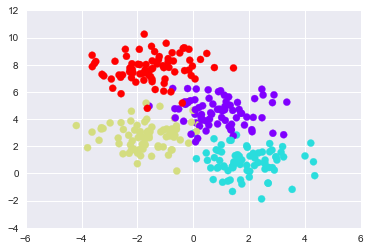

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.xlim(-6, 6)
plt.ylim(-4, 12)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


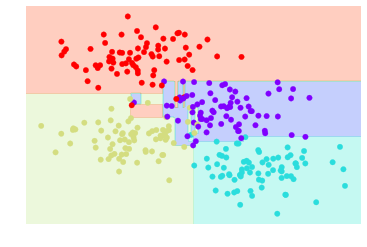

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # 画出训练集的点
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(), X, y)

### 5.8.2　评估器集成算法：随机森林

通过组合多个过拟合评估器来降低过拟合程度的想法其实是一种集成学习方法，称为装袋
算法。装袋算法使用并行评估器对数据进行有放回抽取集成（也可以说是大杂烩），每个
评估器都对数据过拟合，通过求均值可以获得更好的分类结果。随机决策树的集成算法就
是随机森林。

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


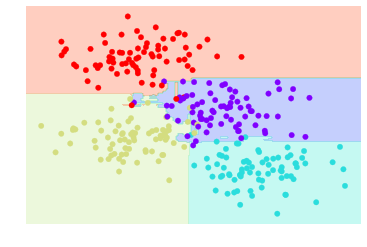

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=0)

bag.fit(X, y)
visualize_classifier(bag, X, y)

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


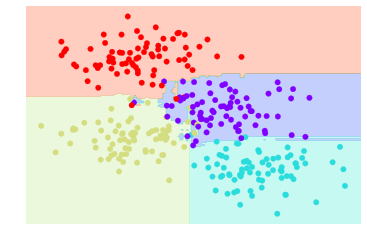

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### 5.8.3　随机森林回归

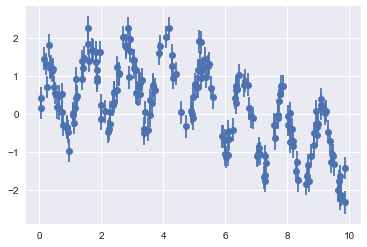

In [9]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

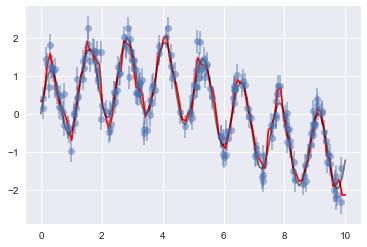

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 100)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### Example: Random Forest for Classifying Digits

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

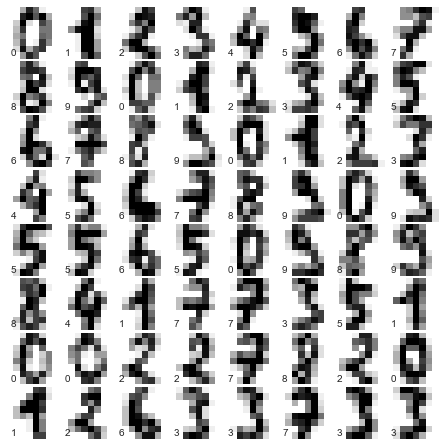

In [14]:
# 设置图形对象
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    # 画数字：每个数字是8像素×8像素
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # 用target值给图像作标注
    ax.text(0, 7, str(digits.target[i]))

使用随机森林快速分类数字

In [15]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_pred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



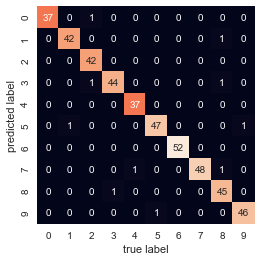

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.8.5　随机森林总结

<ul>
随机森林是一种强大的机器学习方法，它的优势在于以下几点。
<li>因为决策树的原理很简单，所以它的训练和预测速度都非常快。另外，多任务可以直接
并行计算，因为每棵树都是完全独立的。</li>
<li>多棵树可以进行概率分类：多个评估器之间的多数投票可以给出概率的估计值（使用
Scikit-Learn 的 predict_proba() 方法）。</li>
<li>无参数模型很灵活，在其他评估器都欠拟合的任务中表现突出。</li>
</ul>

随机森林的主要缺点在于其结果不太容易解释，也就是说，如果你想要总结分类模型的意
义，随机森林可能不是最佳选择。